In [1]:
# Find project root

from pathlib import Path
try:
    root = Path(__file__).resolve().parent
except NameError:
    root = Path.cwd()  # fallback for Jupyter notebooks

while root.parent != root:
    if any((root / marker).exists() for marker in ["README.md"]):
        break
    root = root.parent

# Fallback in case nothing found
if not any((root / marker).exists() for marker in ["README.md"]):
    print("Could not locate project root — defaulting to current working directory")
    root = Path.cwd()

root = str(root)
print(f"Root folder detected at: {root}")

Root folder detected at: p:\Aurélien\Bac Sup\EPFL\Cours\M3\ENV-540 (Image processing for Earth observation)\Project\IPEO-Species-distribution


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from GeoPlantDataset import GeoPlantDataset, viz_sample

In [4]:
train_dataset = GeoPlantDataset(data_folder=f"{root}/data", split="train")
val_dataset = GeoPlantDataset(data_folder=f"{root}/data", split="val")
test_dataset = GeoPlantDataset(data_folder=f"{root}/data", split="test")
print(f"Train dataset length: {len(train_dataset)} samples")
print(f"Validation dataset length: {len(val_dataset)} samples")
print(f"Test dataset length: {len(test_dataset)} samples")

Train dataset length: 4000 samples
Validation dataset length: 1000 samples
Test dataset length: 1000 samples


In [6]:
sample = train_dataset[0]
print(sample.keys())

dict_keys(['survey_id', 'lon', 'lat', 'env_variables', 'landsat_timeseries', 'satellite_patch', 'species_labels'])


## Looking at one sample

Survey ID: 212
Location: (43.134956, 3.099038)
== Environmental Variables ==
BIO1 (Annual Mean Temperature)....................................: 2883
BIO2 (Mean Diurnal Range (Mean of monthly (max temp - min temp))).: 68
BIO3 (Isothermality (BIO2/BIO7) (x100))...........................: 3
BIO4 (Temperature Seasonality (standard deviation x100))..........: 5545
BIO5 (Max Temperature of Warmest Month)...........................: 3007
BIO6 (Min Temperature of Coldest Month)...........................: 2780
BIO7 (Temperature Annual Range (BIO5-BIO6)).......................: 227
BIO8 (Mean Temperature of Wettest Quarter)........................: 2854
BIO9 (Mean Temperature of Driest Quarter).........................: 2958
BIO10 (Mean Temperature of Warmest Quarter).......................: 2958
BIO11 (Mean Temperature of Coldest Quarter).......................: 2816
BIO12 (Annual Precipitation)......................................: 6355
BIO13 (Precipitation of Wettest Month)...............

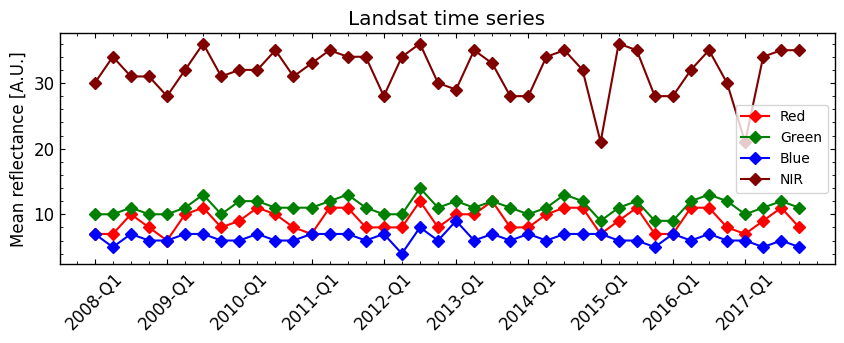

== Satellite Patch ==


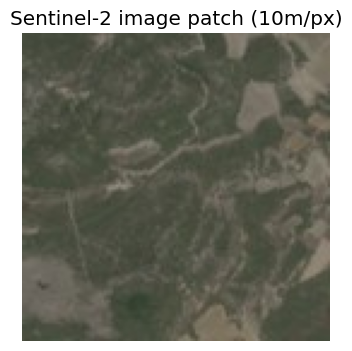

== Species Labels ==
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0]


In [20]:
viz_sample(sample)

## Dataset imbalance

In [21]:
species_labels = np.array([s['species_labels'] for s in train_dataset])

In [23]:
species_counts = species_labels.sum(axis=0)
print(f"Number of samples: {len(train_dataset)}")
print(f"Minimum occurrences for one species: {species_counts.min()}")
print(f"Maximum occurrences for one species: {species_counts.max()}")
print(f"Average occurrences for one species: {species_counts.mean():.2f}")
print(f"Minimum number of species for one sample: {species_labels.sum(axis=1).min()}")
print(f"Maximum number of species for one sample: {species_labels.sum(axis=1).max()}")
print(f"Average number of species for one sample: {species_labels.sum(axis=1).mean():.2f}")

Number of samples: 4000
Minimum occurrences for one species: 31
Maximum occurrences for one species: 968
Average occurrences for one species: 151.97
Minimum number of species for one sample: 0
Maximum number of species for one sample: 57
Average number of species for one sample: 12.99


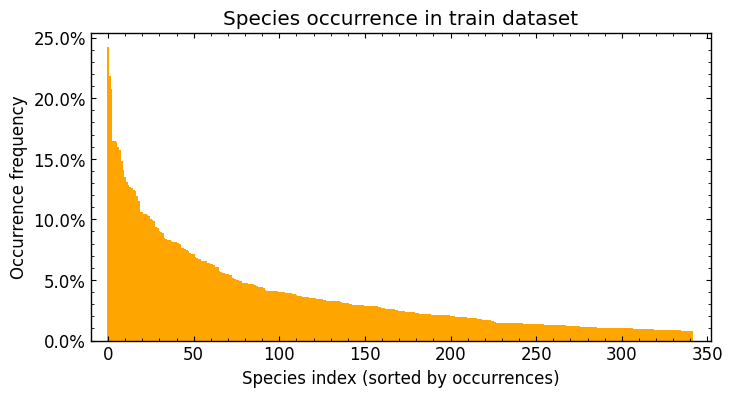

In [24]:
species_counts.sort()
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(np.arange(len(species_counts)), species_counts[::-1]/len(train_dataset), color='orange', width=1.0)
ax.set_xlim(-10, len(species_counts)+10)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
ax.set_xlabel("Species index (sorted by occurrences)")
ax.set_ylabel("Occurrence frequency")
ax.set_title("Species occurrence in train dataset")
fig.savefig("species_occurrence.png", dpi=300, bbox_inches='tight')
plt.show()